In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def veri_yukle(dosya):
    data = pd.read_excel("cleaned_data.xlsx")
    print("Veriler yüklendi")
    print(data.head())
    return data

def veri_incele(data):
    print("\nKayip Degerler:\n", data.isnull().sum())
    print("\nVeri Infosu:")
    print(data.info())
    print("\nVeri Istatistigi:\n", data.describe())

def kayip_degerlerle_ilgilen(data):
    data['Km'].fillna(data['Km'].median(), inplace=True)
    data['hp'].fillna(data['hp'].median(), inplace=True)
    data['year'].fillna(data['year'].median(), inplace=True)
    data.dropna(subset=['price'], inplace=True)
    return data

def aykiri_degerleri_kaldir(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64'])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"\nAykiriliklar kaldirildi, kalan veri bicimi: {filtered_data.shape}")
    return filtered_data

def ozellikleri_normalize_et(data, features):
    scaler = StandardScaler()
    data[features] = scaler.fit_transform(data[features])
    print("\nOzellikler normalize edildi")
    print(data.head())
    return data

if __name__ == "__main__":
    dosya = 'cleaned_data.xlsx'
    data = veri_yukle(dosya)
    veri_incele(data)
    data = kayip_degerlerle_ilgilen(data)
    data = aykiri_degerleri_kaldir(data)
    data = ozellikleri_normalize_et(data, ['Km', 'hp', 'year'])
    
    output_file = 'processed_data.xlsx'
    data.to_excel(output_file, index=False)
    print(f"\nVerinin hazirlanmasi tamamlandi. Hazır veri bu sekilde kaydedildi '{output_file}'.")


Veriler yüklendi
                                               Model       Km            gear  \
0  Volkswagen Golf Variant SW 1.6 CR TDi DSG // M...  337.000       Automatic   
1  Volkswagen Golf 1.4 TSI Highline MotorRevisie|...  159.756          Manual   
2  Volkswagen Golf GTI 5p 2.0 tsi dsg 210CV BELLI...  169.914  Semi-automatic   
3  Volkswagen Golf Golf 1.6 TDI 5p. Comfortline B...  170.000          Manual   
4  Volkswagen Golf 1.4 TSI Highline Automaat 122P...  125.278       Automatic   

   year fuel_type   hp   price  
0  2012    Diesel  105   4.500  
1  2013  Gasoline  122   9.999  
2  2012  Gasoline  211  13.990  
3  2013    Diesel  105   8.900  
4  2013  Gasoline  122  11.945  

Kayip Degerler:
 Model        0
Km           0
gear         0
year         0
fuel_type    0
hp           0
price        0
dtype: int64

Veri Infosu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
--

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# verileri on isleme tabi tutan fonksiyon
def veri_onislem(dosya):
    # islenmis veriyi yukle
    data = pd.read_excel("processed_data.xlsx")
    
    # ihtiyacimiz olan ozellikleri ve hedefi belirle
    X = data[['Km', 'hp', 'year']]  # input
    y = data['price']  # hedef

    # datayi train ve test icin bolumle (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Veri on isleme tamamlandi")
    print(f"train verisi icin shape: {X_train.shape}")
    print(f"testing verisi icin shape: {X_test.shape}")

    # bolumlenmis veriyi model trainingi icin returnle
    return X_train, X_test, y_train, y_test

# dosya direkt execute edilirse on islemeyi yap
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = veri_onislem('processed_data.xlsx')

Veri on isleme tamamlandi
train verisi icin shape: (1273, 3)
testing verisi icin shape: (319, 3)


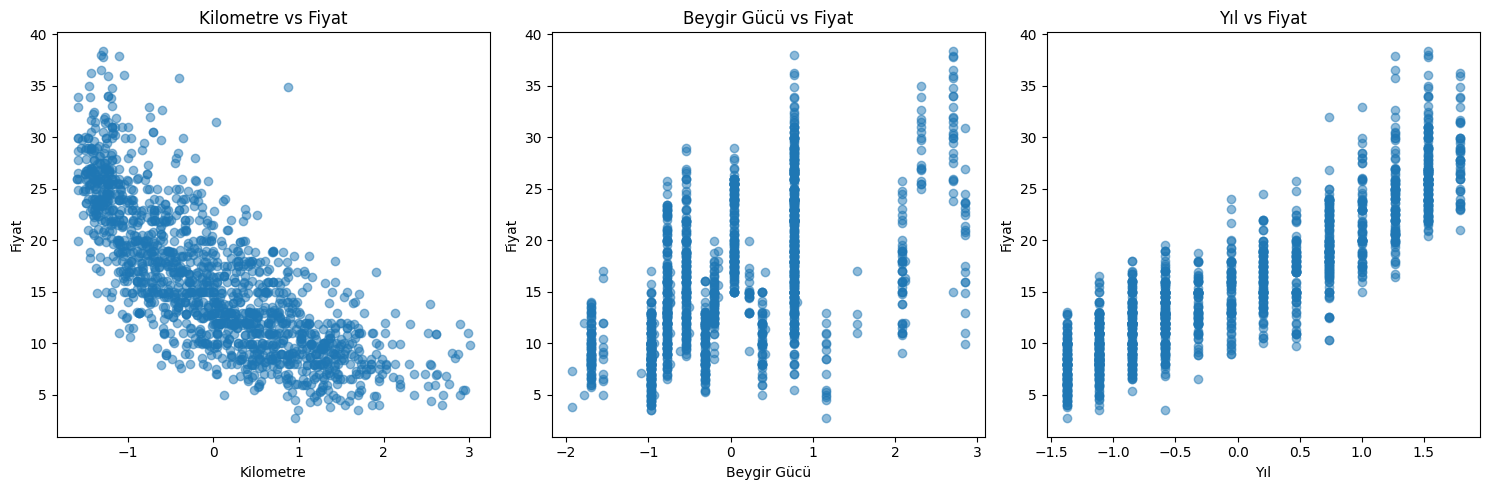

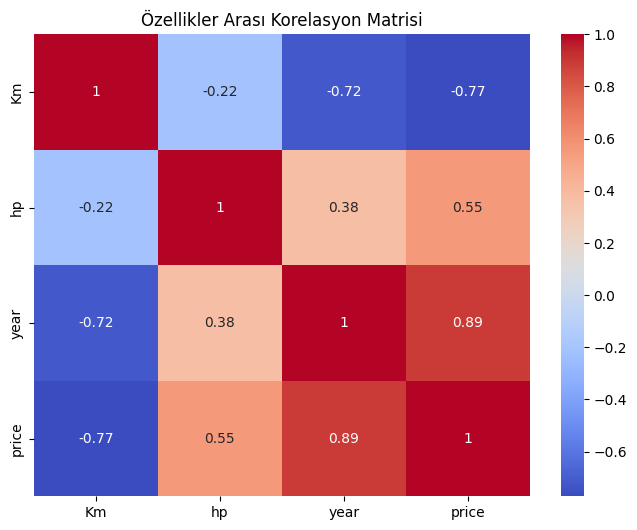

Epoch 1/103


C:\Users\GOK\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 305.6436 - val_loss: 261.4628
Epoch 2/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 237.6541 - val_loss: 137.6735
Epoch 3/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.5414 - val_loss: 18.4993
Epoch 4/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.7127 - val_loss: 14.5969
Epoch 5/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.8140 - val_loss: 12.4916
Epoch 6/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5315 - val_loss: 10.6021
Epoch 7/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9482 - val_loss: 9.2555
Epoch 8/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0190 - val_loss: 8.1298
Epoch 9/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4777 - val_loss: 7.4340
Epoch 10/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8875 - val_loss: 6.7604
Epoch 11/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7616 - val_loss: 6.2756
Epoch 12/103
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

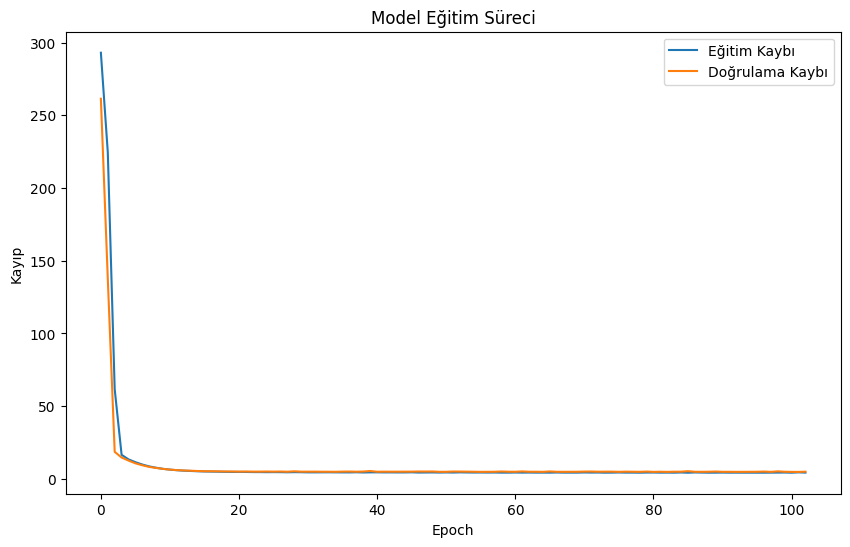

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4044 
Test kaybı: 4.848001480102539
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


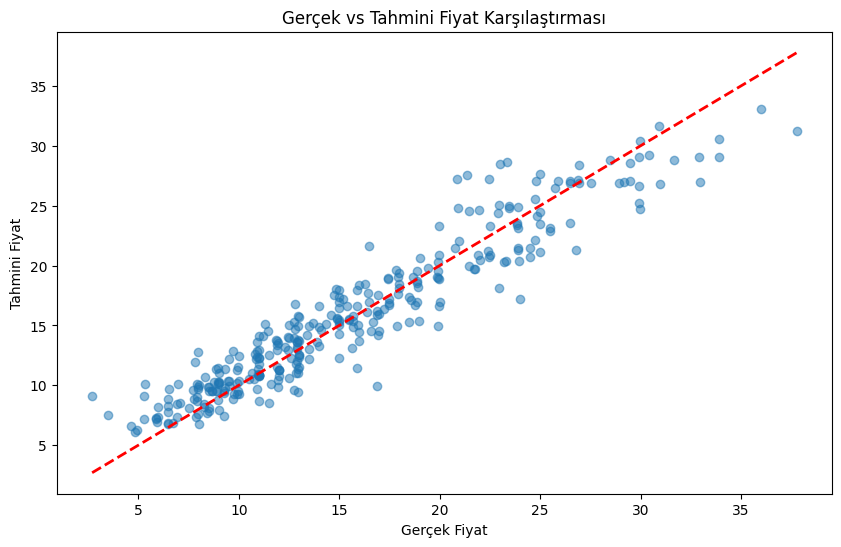

Tahmini fiyat: 12.831825256347656, Gerçek fiyat: 9.7
Tahmini fiyat: 17.372419357299805, Gerçek fiyat: 14.979
Tahmini fiyat: 25.187965393066406, Gerçek fiyat: 29.94
Tahmini fiyat: 13.624642372131348, Gerçek fiyat: 12.9
Tahmini fiyat: 27.262922286987305, Gerçek fiyat: 22.444

Arabanın özelliklerini girin:


Arabanın yılı:  2022
Arabanın km'sini yazın:  50000
Arabanın beygir gücünü yazın:  120


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmini fiyat: $8960.21


C:\Users\GOK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


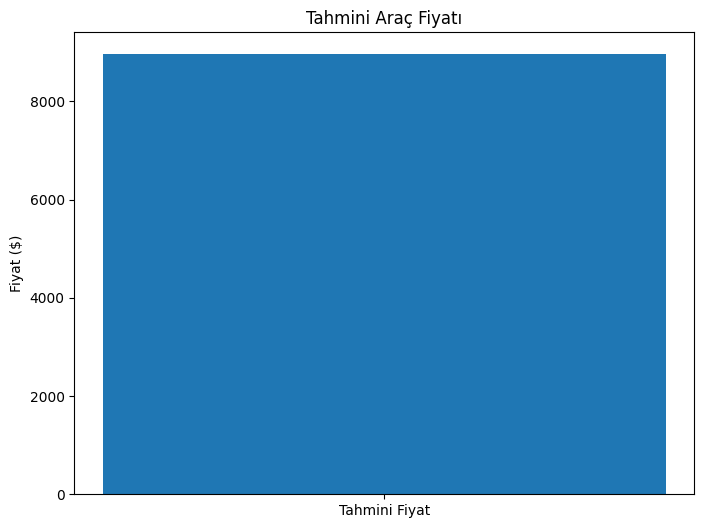

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
file_path = 'processed_data.xlsx'
data = pd.read_excel(file_path)

# Özellikleri ve hedefi belirle
X = data[['Km', 'hp', 'year']]
y = data['price']

# Veri analizi görselleştirmeleri
plt.figure(figsize=(15, 5))

# Kilometre vs Fiyat
plt.subplot(131)
plt.scatter(data['Km'], data['price'], alpha=0.5)
plt.xlabel('Kilometre')
plt.ylabel('Fiyat')
plt.title('Kilometre vs Fiyat')

# Beygir Gücü vs Fiyat
plt.subplot(132)
plt.scatter(data['hp'], data['price'], alpha=0.5)
plt.xlabel('Beygir Gücü')
plt.ylabel('Fiyat')
plt.title('Beygir Gücü vs Fiyat')

# Yıl vs Fiyat
plt.subplot(133)
plt.scatter(data['year'], data['price'], alpha=0.5)
plt.xlabel('Yıl')
plt.ylabel('Fiyat')
plt.title('Yıl vs Fiyat')

plt.tight_layout()
plt.show()

# Korelasyon matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Km', 'hp', 'year', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

# Veriyi böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalize et
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model oluştur
def model_insasi():
    model = Sequential()
    model.add(Dense(64, input_dim=3, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Modeli eğit
model = model_insasi()
history = model.fit(X_train, y_train, epochs=103, batch_size=32, 
                   validation_data=(X_test, y_test), verbose=1)

# Eğitim sürecini görselleştir
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim Süreci')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Model değerlendirme
kayip = model.evaluate(X_test, y_test)
print(f"Test kaybı: {kayip}")

# Tahminler
tahminler = model.predict(X_test)

# Tahmin vs Gerçek değer karşılaştırması
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tahminler, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmini Fiyat')
plt.title('Gerçek vs Tahmini Fiyat Karşılaştırması')
plt.show()

# İlk 5 tahmin sonucu
for i in range(5):
    print(f"Tahmini fiyat: {tahminler[i][0]}, Gerçek fiyat: {y_test.iloc[i]}")

# Kullanıcı girişi ile tahmin
print("\nArabanın özelliklerini girin:")
yil = float(input("Arabanın yılı: "))
kilometre = float(input("Arabanın km'sini yazın: "))
beygirgucu = float(input("Arabanın beygir gücünü yazın: "))

# Kullanıcı girişini hazırla
input_data = np.array([[kilometre, beygirgucu, yil]])
input_data_scaled = scaler.transform(input_data)

# Tahmin yap
predicted_price = model.predict(input_data_scaled)
print(f"Tahmini fiyat: ${predicted_price[0][0]:.2f}")

# Tahmin sonucunu görselleştir
plt.figure(figsize=(8, 6))
plt.bar(['Tahmini Fiyat'], [predicted_price[0][0]])
plt.title('Tahmini Araç Fiyatı')
plt.ylabel('Fiyat ($)')
plt.show()